In [2]:
#Code to get the tweeter data, get the url, copy the pin and paste here.
import tweepy
import webbrowser
import time
cosumer_key = "vQOWNASyo8XuilBewBdKISyVE"
consumer_secret = "TCJeRSk2R1HpK0Fx3PDrYfvuezuGUYLfG7yiwtYjykcTskIysF"
callback_url = 'oob' # URL : https://
auth = tweepy.OAuthHandler(cosumer_key, consumer_secret, callback_url)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin number? ")
user_pin_input
auth.get_access_token(user_pin_input)
print(auth.access_token, auth.access_token_secret)
api = tweepy.API(auth)
me = api.me()
print(me.screen_name)

https://api.twitter.com/oauth/authorize?oauth_token=Z0i09wAAAAABOBRfAAABeSq8b5Q
What's the pin number? 1068852
422268986-l2D9HR2hQg0nS9ZQmKiLVCAeFG7iiLKpUCGuFbNq FNcBeD3b1fsa9HGHg7DOwVsuVKQIP6QiONU7CeH5y5MIK
Rakesh_Singh01


In [3]:
#Get the tweeter data for any of the company and store line by line code into a variable/file
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
stock='BTC'
q=stock
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
#Code to get limited nymber of tweets
tweets = tweepy.Cursor(api.search,
                   q='BTC',
                   lang="en",
                   since='2020-11-01').items(2000)

#print(type(tweets))
# Remove URLs
#Blank dataframe to store results
df3 = pd.DataFrame()

tweets_list = []
score_list=[]
prediction_list=[]

#Get each tweet and analyze the sentiment
for tweet in tweets:
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        sen=SentimentIntensityAnalyzer()
        sa=sen.polarity_scores(tweet.text)
        print(sa)
        '''
        if sa["pos"] > sa["neg"]:
            prediction = "Positive"
            score = prediction+":" +str(sa["pos"])
        else:
            prediction = "Negative"
            score = prediction+ ":"+str(sa["neg"])'''
        #Logic for Buy,sell, Hold : If Positive=Buy, Negative=Sell, Neutral=Hold
        if sa["compound"]>= 0.05:
            prediction="Positive"
            score = prediction+":" +str(sa["compound"])
            
        elif sa["compound"]<= -0.05:
            prediction="Negative"
            score = prediction+":" +str(sa["compound"])
        else:
            prediction="Neutral"
            score = prediction+":" +str(sa["compound"])
        
        #print(sa)
        #mod = sa + tweet.text
        score_list.append(score)
        #tweets_list.append(sa)
        tweets_list.append(tweet.text)
        prediction_list.append(prediction)
        
        #Store each tweets sentiment score in a dataframe
        df3 = df3.append(pd.Series([score,tweet.text,prediction,tweet.created_at,q],index=['Score','Tweet','Prediction','CreatedDate','CompanyName']), ignore_index=True)
        

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakeshmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6705}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9186}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.079, 'neu': 0.787, 'pos': 0.135, 'compound': 0.126}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.5379}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.181, 'neu': 0.688, 'pos': 0.131, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4215}
{'neg': 0.083, 'neu': 0.685, 'pos': 0.232, 'compound': 0.6289}
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.8271}
{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound

{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.2382}
{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.4759}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
{'neg': 0.181, 'neu': 0.688, 'pos': 0.131, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.4389}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.8271

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4168}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.8555}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}
{'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.6808}
{'neg': 0.117, 'neu': 0.696, 'pos': 0.187, 'compound': 0.2263}
{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'compound': -0.3384}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.4019}
{'neg': 0.0, 'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.283, 'neu': 0.601, 'pos': 0.116, 'compound': -0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}
{'neg': 0.079, 'neu': 0.787, 'pos': 0.135, 'compound': 0.126}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4754}
{'neg': 0.283, 'neu': 0.601, 'pos': 0.116, 'compound': -0.4404}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.7506}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.118, 'neu': 0.758, 'pos': 0.124, 'compound': 0.0387}
{'neg': 0.264, 'neu': 0.56, 'pos': 0.176, 'compound': -0.296}
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.076, 'neu': 0.649, 'pos': 0.275, 'compound': 0.6705}
{'

{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.068, 'neu': 0.764, 'pos': 0.168, 'compound': 0.5216}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.6808}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.7

{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.1406}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.094, 'neu': 0.651, 'pos': 0.256, 'compound': 0.4581}
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4588}
{'neg': 0.114, 'neu': 0.462, 'pos': 0.423, 'compound': 0.876}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.7425}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.5106}
{'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.4874}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.8555}
{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.4581}
{'neg':

In [4]:
df3.to_csv(r'BTC.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)
print(df3)

    CompanyName         CreatedDate Prediction             Score  \
0           BTC 2021-05-02 01:41:11   Positive   Positive:0.6705   
1           BTC 2021-05-02 01:41:08   Positive   Positive:0.6705   
2           BTC 2021-05-02 01:41:03    Neutral       Neutral:0.0   
3           BTC 2021-05-02 01:41:03   Positive   Positive:0.9186   
4           BTC 2021-05-02 01:41:00   Positive    Positive:0.296   
..          ...                 ...        ...               ...   
811         BTC 2021-05-02 01:03:52   Negative  Negative:-0.2023   
812         BTC 2021-05-02 01:03:49    Neutral       Neutral:0.0   
813         BTC 2021-05-02 01:03:49   Positive   Positive:0.7906   
814         BTC 2021-05-02 01:03:47   Positive   Positive:0.4574   
815         BTC 2021-05-02 01:03:43   Negative  Negative:-0.7717   

                                                 Tweet  
0    @KList_ Nice project \nPromising project ive e...  
1    $SLM not a lot of people know about this proje...  
2    Palladi

<ipython-input-4-95fad8ab4087>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df3.to_csv(r'BTC.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)


In [6]:
# Calculate the average of prediction to display the result
#df3 = pd.read_csv(r'BTC.csv')
cntPrediction=df3['Prediction'].count()
print(cntPrediction)

816


In [7]:
cntPositive=list(df3.Prediction).count('Positive')
cntNegative=list(df3.Prediction).count('Negative')
cntNeutral=list(df3.Prediction).count('Neutral')
percentPositive=(cntPositive/cntPrediction)*100
percentNegative=(cntNegative/cntPrediction)*100
percentNeutral=(cntNeutral/cntPrediction)*100
print("Buy%  = ", percentPositive)
print("Sell% = ", percentNegative)
print("Hold% = ", percentNeutral)

Buy%  =  40.07352941176471
Sell% =  18.872549019607842
Hold% =  41.05392156862745


In [8]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
# and set the environment variables. See http://twil.io/secure
#account_sid = os.environ['Use your SID']
#auth_token = os.environ['Use your token']
account_sid = 'Use your SID'
auth_token = 'Use your token'
client = Client(account_sid, auth_token)
analysis = 'Stock='+str(q) + ' Buy%='+ str(percentPositive) + ' Sell%=' + str(percentNegative) + ' Hold%=' + str(percentNeutral)
#body = 'Buy=%d Sell=%d Hold=%d'
message = client.messages.create(
                              body=analysis,
                              from_='+13142549333',
                              to='+12024289119'
                          )

print(message.sid)
print(message)

SM05b179bff8b1407aa683863c3fd7b574
<Twilio.Api.V2010.MessageInstance account_sid=AC2021d083d53ba956203c588ab4ff9c9b sid=SM05b179bff8b1407aa683863c3fd7b574>


In [9]:
#Create a dataframe to plot graphs
df_BTCgraph=pd.DataFrame([[q,percentPositive,percentNegative,percentNeutral]],columns=['CompanyName','Buy','Sell','Hold'])
print(df_BTCgraph)

  CompanyName        Buy       Sell       Hold
0         BTC  40.073529  18.872549  41.053922


<AxesSubplot:>

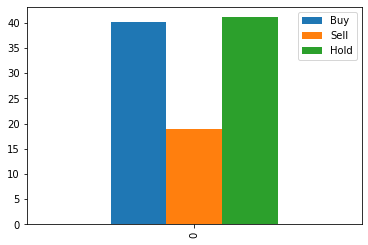

In [10]:
df_BTCgraph.plot.bar()